In [31]:
# loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

In [32]:
# reading the annotated dataset
df = pd.read_csv('cre_root_detection.csv')

# Exploratory Data Analysis

In [33]:
# chekcing missing values
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
title,0,0.000000
Krumhansl-Shmuckler,0,0.000000
simple weights,0,0.000000
Aarden Essen,0,0.000000
Bellman Budge,0,0.000000
Temperly Kostka Payne,0,0.000000
as transcribed,0,0.000000
final_note,0,0.000000
freq note,1,0.001208
freq weighted acc,1,0.001208


In [34]:
# freq note and freq weighted acc data were found null at some places, and so replaced
# with frequent value of the same

df['freq note'].fillna(df['freq note'].mode()[0], inplace = True)
df['freq weighted acc'].fillna(df['freq weighted acc'].mode()[0], inplace = True)

In [35]:
# finding the null values
df.isnull().sum()

title                    0
Krumhansl-Shmuckler      0
simple weights           0
Aarden Essen             0
Bellman Budge            0
Temperly Kostka Payne    0
as transcribed           0
final_note               0
freq note                0
freq weighted acc        0
certainty                0
root                     0
expert assigned          0
dtype: int64

In [36]:
# just to get statistics of the data
df.describe()


,Krumhansl-Shmuckler,simple weights,Aarden Essen,Bellman Budge,Temperly Kostka Payne,as transcribed,final_note,freq note,freq weighted acc,certainty,root,expert assigned
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,4.712418,5.022876,4.712418,4.576797,4.620098,5.143791,5.251634,6.322712,6.121732,0.713824,4.786765,4.959967
std,2.806192,2.834976,2.806192,2.743428,2.724221,2.711638,3.080084,3.411482,3.467270,0.180730,2.798397,2.798060
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.560000,2.000000,2.000000
50%,4.000000,7.000000,4.000000,4.000000,4.000000,7.000000,6.000000,7.000000,7.000000,0.780000,4.000000,4.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,9.000000,9.000000,0.890000,7.000000,7.000000
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.000000,11.000000,11.000000


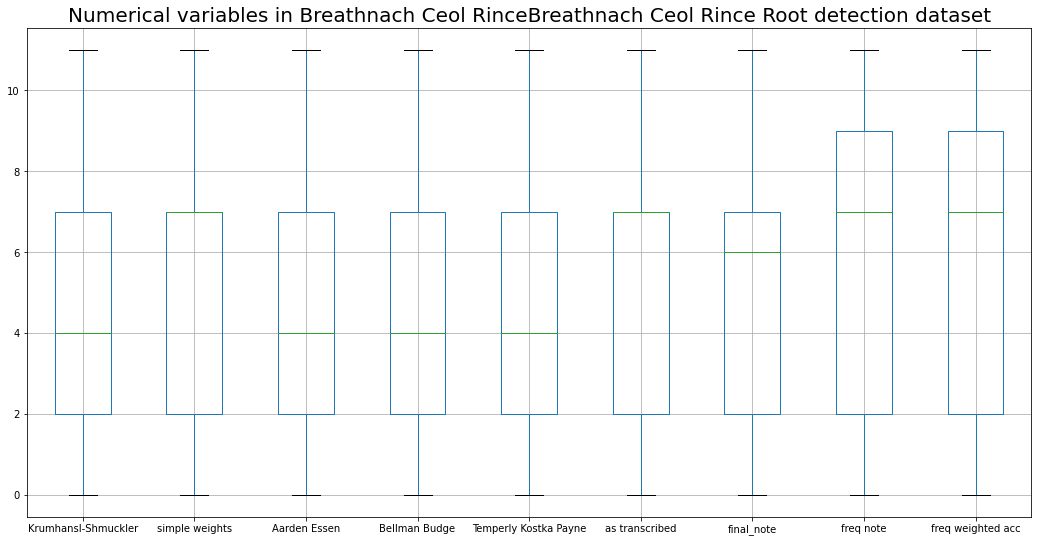

In [37]:
# want to check the distribution of the following attributes and then draw the boxplot
num_cols = ['Krumhansl-Shmuckler','simple weights', 'Aarden Essen','Bellman Budge', 'Temperly Kostka Payne', 'as transcribed','final_note', 'freq note', 'freq weighted acc']
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Numerical variables in Breathnach Ceol RinceBreathnach Ceol Rince Root detection dataset", fontsize=20)
plt.show()

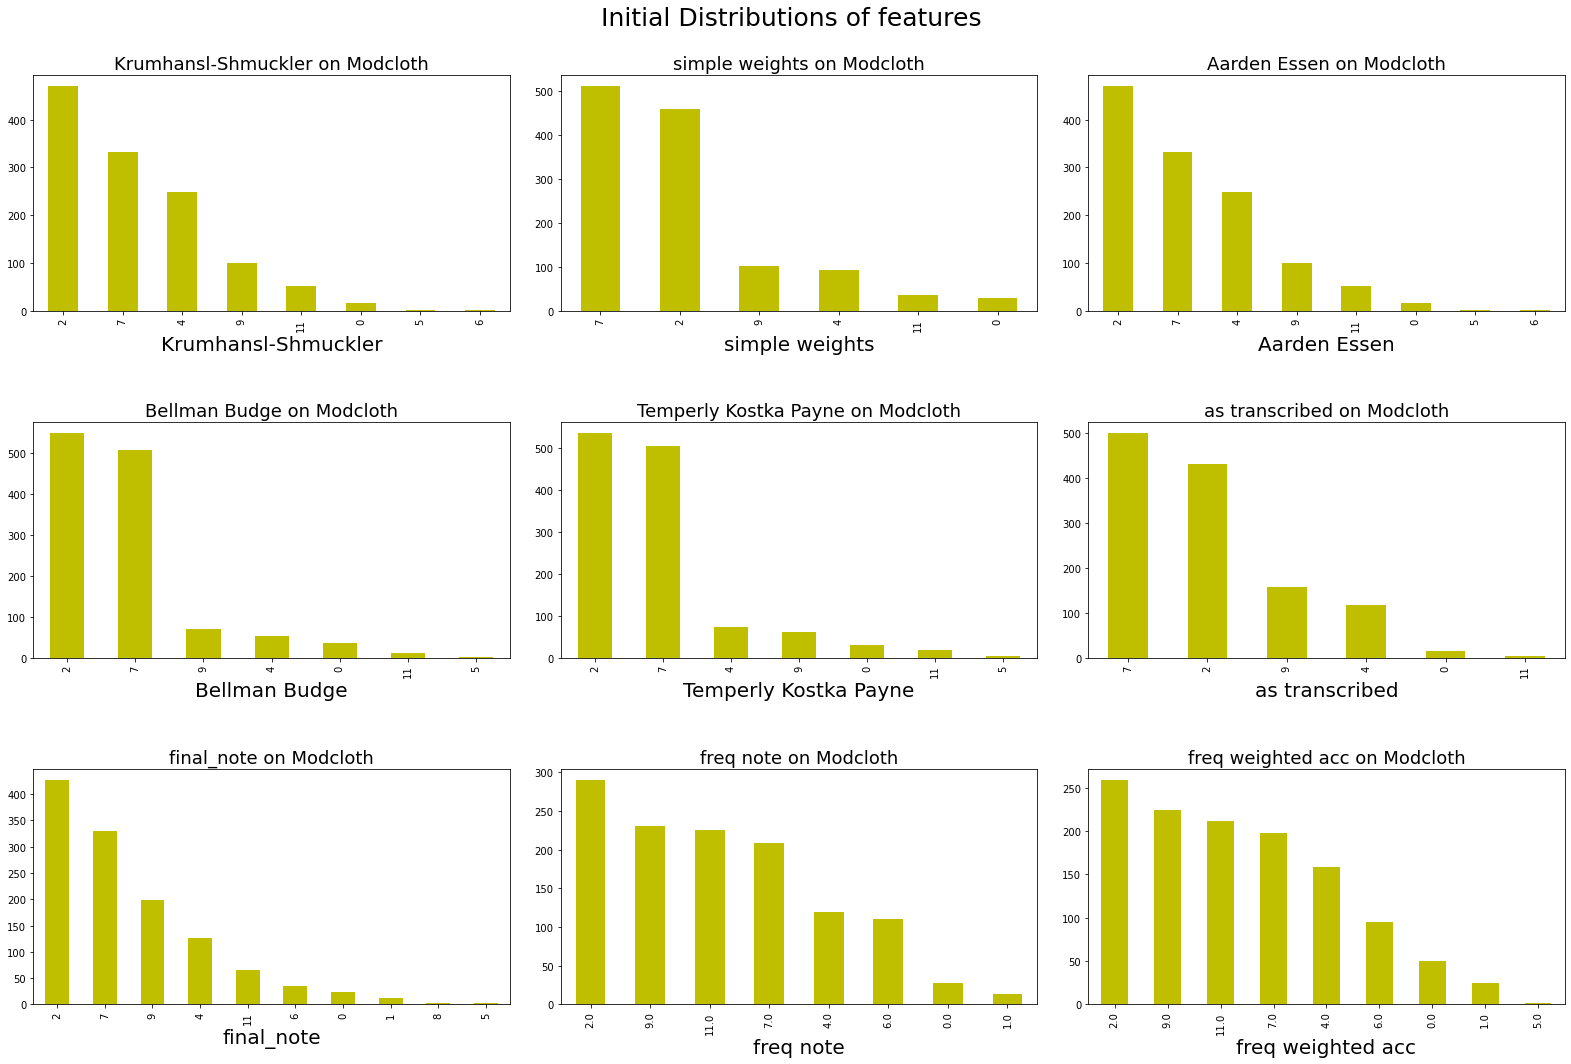

In [38]:
# a function to visualize distribution of each variable
def plot_dist(col, ax):
    df[col][df[col].notnull()].value_counts().plot(kind='bar', facecolor='y', ax=ax)
    ax.set_xlabel('{}'.format(col), fontsize=20)
    ax.set_title("{} on Modcloth".format(col), fontsize= 18)
    return ax

f, ax = plt.subplots(3,3, figsize = (22,15))
f.tight_layout(h_pad=9, w_pad=2, rect=[0, 0.03, 1, 0.93])
cols = num_cols 
k = 0
for i in range(3):
    for j in range(3):
        plot_dist(cols[k], ax[i][j])
        k += 1
__ = plt.suptitle("Initial Distributions of features", fontsize= 25)

In [39]:
# Exploring 'expert assigned' variable
df['expert assigned'].value_counts()

2     481
7     415
9     181
4     126
0      14
11      6
5       1
Name: expert assigned, dtype: int64

<AxesSubplot:xlabel='expert assigned', ylabel='count'>

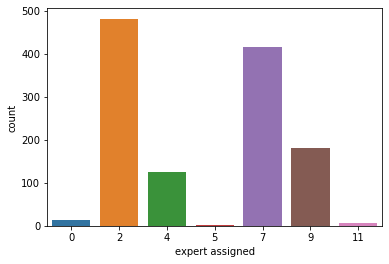

In [40]:
# draw expert assigned value
sns.countplot(x='expert assigned', data=df)


# Preparing for classification algorithms

In [41]:
# select few columns for classification
df = df[["Krumhansl-Shmuckler", "simple weights","Aarden Essen", "Bellman Budge","Temperly Kostka Payne", "as transcribed", "final_note", 'freq note', 'freq weighted acc', 'expert assigned']]


In [42]:
# Declare feature vector and target variable

X = df.drop(['expert assigned'], axis=1)
y = df['expert assigned']

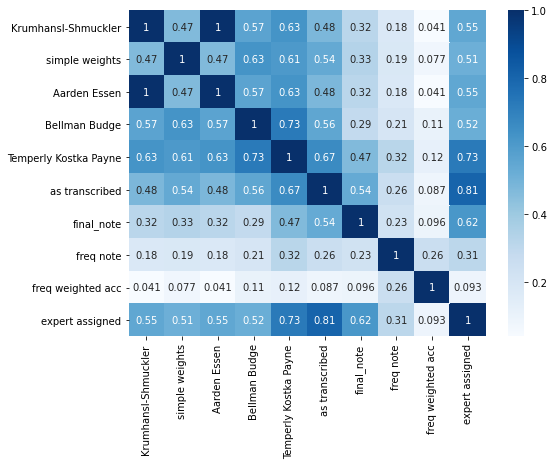

In [43]:
# drawing heatmap - correlation of attributes with target variable

plt.figure(figsize=(8,6))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [44]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [45]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape


((979, 9), (245, 9))

# Decision tree (criterion='gini')


In [46]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=56)

# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=56)

In [47]:
#  Predict the Test results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)


In [48]:
# Check accuracy score with criterion gini index
# importing relevant library
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))


Model accuracy score with criterion gini index: 0.8735


In [60]:
# Visualize decision-trees
#plt.figure(figsize=(30,14))

#from sklearn import tree

#tree.plot_tree(clf_gini.fit(X_train, y_train))


# Decision Tree (criterion = entropy)


In [50]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)


In [51]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))


Model accuracy score with criterion entropy: 0.8653


# Random Forest


In [52]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)


# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)


print('Model accuracy score with default number of decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with default number of decision-trees : 0.9020


In [53]:
# Random Forest Classifier model with parameter n_estimators=150
rfc_150 = RandomForestClassifier(n_estimators=150, random_state=0)

# fit the model to the training set
rfc_150.fit(X_train, y_train)

# Predict on the test set results
y_pred_150 = rfc_150.predict(X_test)


# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_150)))

Model accuracy score with 100 decision-trees : 0.9020


# Finding important features with Random Forest model


In [54]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

# # Find important features with Random Forest model

# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores



as transcribed           0.275105
Temperly Kostka Payne    0.210990
final_note               0.106940
Aarden Essen             0.089120
Krumhansl-Shmuckler      0.084987
simple weights           0.075764
Bellman Budge            0.055640
freq weighted acc        0.051988
freq note                0.049466
dtype: float64

# Visualize feature scores of the features


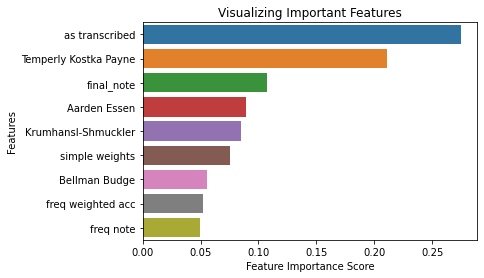

In [55]:

# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

# Random Forest performance on selected features


In [56]:
# declare feature vector and target variable
X = df.drop(['freq note', 'freq weighted acc'], axis=1)

y = df['expert assigned']

In [57]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 30)


In [58]:
# instantiate the classifier with n_estimators = 10

clf = RandomForestClassifier(n_estimators=10, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)
# Predict on the test set results
y_pred = clf.predict(X_test)

# Check accuracy score
print('Model accuracy score with "freq note", "freq weighted acc" variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with "freq note", "freq weighted acc" variable removed : 0.9959


# Finally- Class wise evaluation - Confusion matrix


In [59]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Confusion matrix

 [[ 3  0  0  0  0  0]
 [ 1 78  0  0  0  0]
 [ 0  0 28  0  0  0]
 [ 0  0  0 90  0  0]
 [ 0  0  0  0 44  0]
 [ 0  0  0  0  0  1]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           2       1.00      0.99      0.99        79
           4       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        90
           9       1.00      1.00      1.00        44
          11       1.00      1.00      1.00         1

    accuracy                           1.00       245
   macro avg       0.96      1.00      0.98       245
weighted avg       1.00      1.00      1.00       245

